# Importing Libraries

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [55]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 95 files belonging to 14 classes.
['Black grass49_52', 'Charlock33_36', 'Cleavers25_28', 'Cranes_bill41_44', 'Fat Hen37_40', 'Fersken pileurt_dead_29', 'Field Pansy 45_47', 'Loose Silky_bent53_56', 'Majs1_4', 'Sugar beet9_12', 'Wheat5_8', 'chickweed17_20', 'scentless mayweed13_16', "shepherd's_purse 21_24"]


# Loading Model

In [61]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

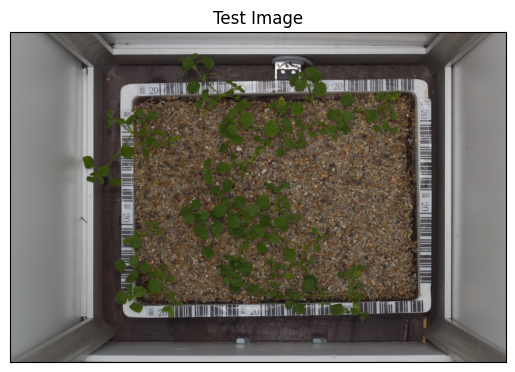

In [97]:
#Test Image Visualization
import cv2
image_path = 'test/IMG_0911_12-17.PNG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [99]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [101]:
print(predictions)

[[4.4931780e-06 5.9781149e-05 3.2872340e-05 9.7449936e-07 1.1725277e-03
  5.0328430e-07 5.2091942e-05 5.2638268e-05 5.4877671e-07 4.0326463e-03
  5.4407869e-06 9.9442792e-01 2.2040738e-05 1.3561064e-04]]


In [105]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

11


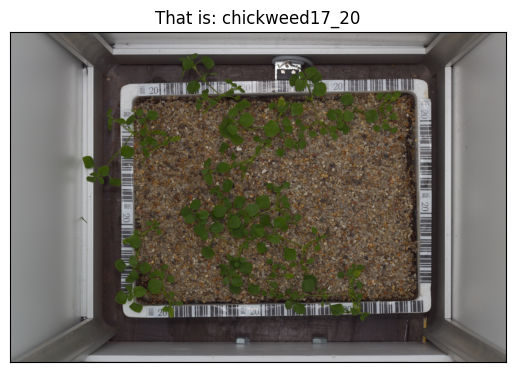

In [107]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"That is: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()